## Predicting Heart Disease Using Machine Learning

This notebook will be used to explore the problem of heart disease classification. It is an end-to-end example of a data science and machine learning proof of concept. The heart disease data set from the UCI Machine Learning Repository consisting of the Cleveland database will be used.

### Problem Definition

The problem we are exploring is in the nature of a binary classification (a sample being one of two things). We are going to be using a number of different features (pieces of information) about a person to predict whether they have heart disease or not. In a statement:

Given clinical parameters about a patient, to what extent can we predict whether or not they have heart disease?

### Features

Heart Disease Data Dictionary:

In [1]:
'''
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)
'''


"\n1. age - age in years\n2. sex - (1 = male; 0 = female)\n3. cp - chest pain type\n    0: Typical angina: chest pain related decrease blood supply to the heart\n    1: Atypical angina: chest pain not related to heart\n    2: Non-anginal pain: typically esophageal spasms (non heart related)\n    3: Asymptomatic: chest pain not showing signs of disease\n4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)\n    anything above 130-140 is typically cause for concern\n5. chol - serum cholestoral in mg/dl\n    serum = LDL + HDL + .2 * triglycerides\n    above 200 is cause for concern\n6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n    '>126' mg/dL signals diabetes\n7. restecg - resting electrocardiographic results\n    0: Nothing to note\n    1: ST-T Wave abnormality\n        can range from mild symptoms to severe problems\n        signals non-normal heart beat\n    2: Possible or definite left ventricular hypertrophy\n        Enlarged heart's main p

### Preparing the Tools

In [2]:
#data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

### Exploratory Data Analysis

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Out of the total 303 readings, 165 patients were positive for heart disease and 138 patients were negative. 

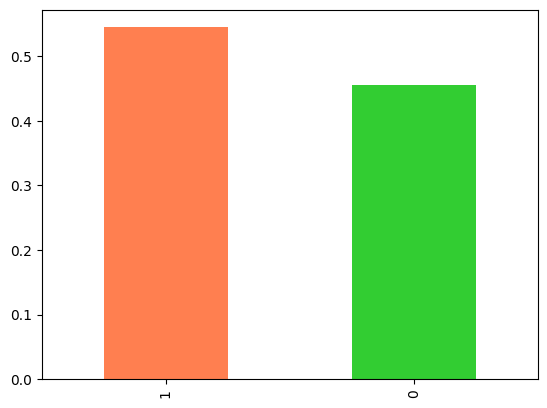

In [6]:
df["target"].value_counts(normalize = True).plot(kind = "bar", 
color = ["coral", "limegreen"]);

We can see that people that had heart disease consisted of around 54% and the remaining 46% did not have heart disease. This means the target column can be considered to be relatively balanced.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing values and all the columns are numerical in nature.

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


There are 207 men and 96 women in the study. Out of the 96 women, 72 have heart disease and 24 do not. Out of the 207 men, 93 have heart disease and 114 do not. This means that in this sample, if a randomly selected patient happened to be a woman, there would be a greater likelihood of heart disease being present, compared to the patient being a man. These numbers can be further visualized with the plot below.

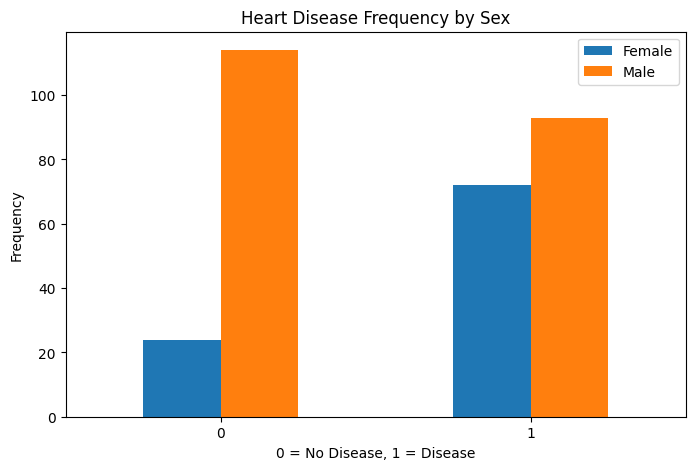

In [11]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(8,5))

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

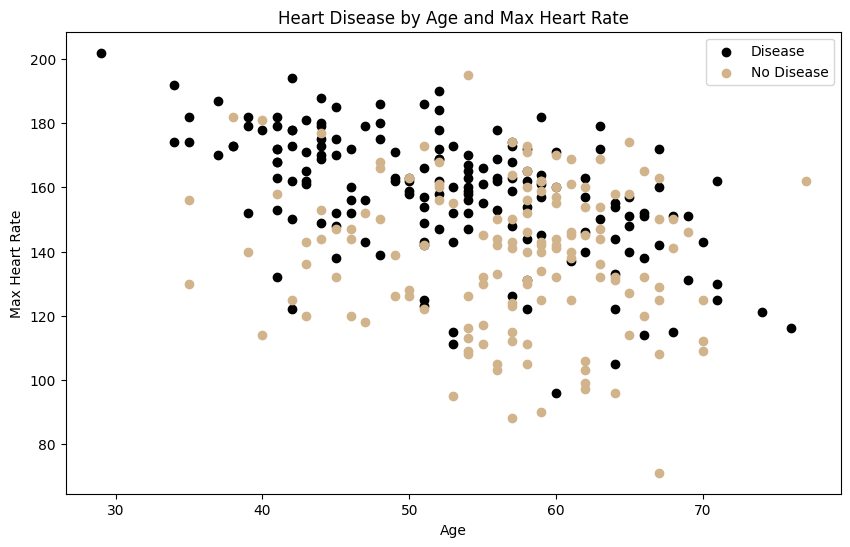

In [12]:
plt.figure(figsize = (10, 6))

# Positive samples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color = "black")

# Negative samples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color = "tan")

plt.title("Heart Disease by Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

There seems to be a slight downward trend in the Disease group. This means that typically, older people have lower heart rates. People with the disease present tend to have higher maximum heart rates, as compared to people that do not. Additionally, most people in the entire sample (from both groups) are from the ages of 40-70; if we see the mean age from the "df.describe" cell we see that it is around 54 years. Our observations with age can be verified with the histogram below.

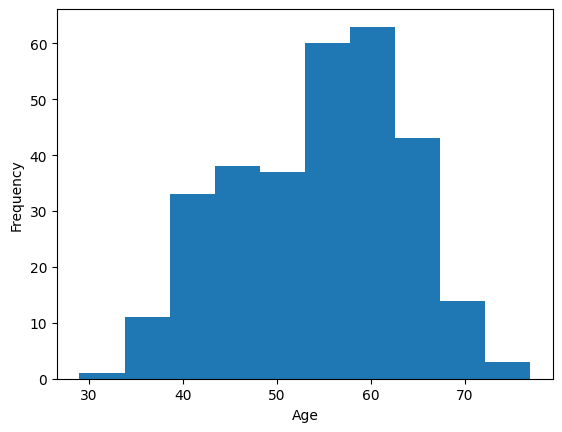

In [13]:
df.age.plot.hist()
plt.xlabel("Age");

In [14]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


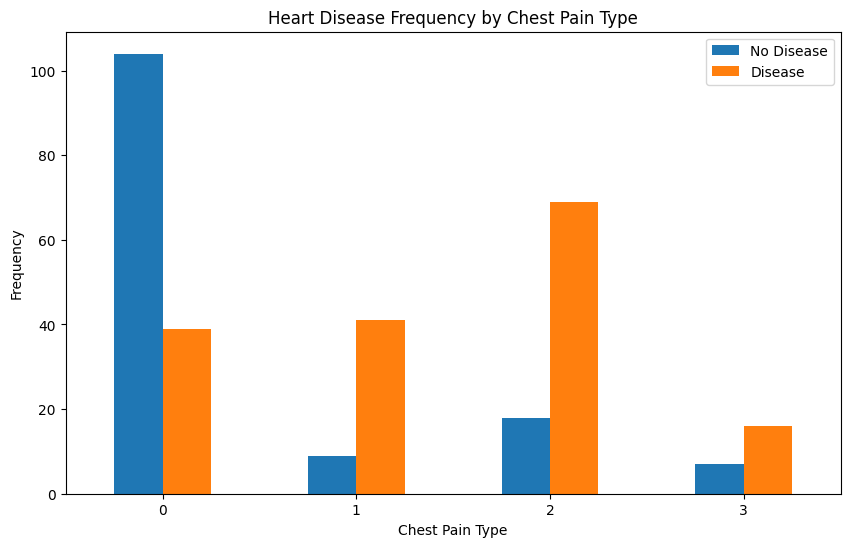

In [15]:
pd.crosstab(df["cp"], df["target"]).plot(kind = "bar", figsize = (10, 6))
plt.title("Heart Disease Frequency by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

The detection of heart disease is most present in the samples with chest pain types 1 and 2. These also have the largest ratios of disease to no disease. From our data dictionary, we know that both of these are non-heart related chest pains. Type 0 also has a decent frequency, which is typical angina- meaning it is related to heart issues, although, there are a lot more samples in this type with no heart disease. It is interesting to observe that there is no immediate connection between chest pain types that are heart related and heart disease. However, if we look at the correlation matrix below, it suggests chest pain and heart disease are positively related.

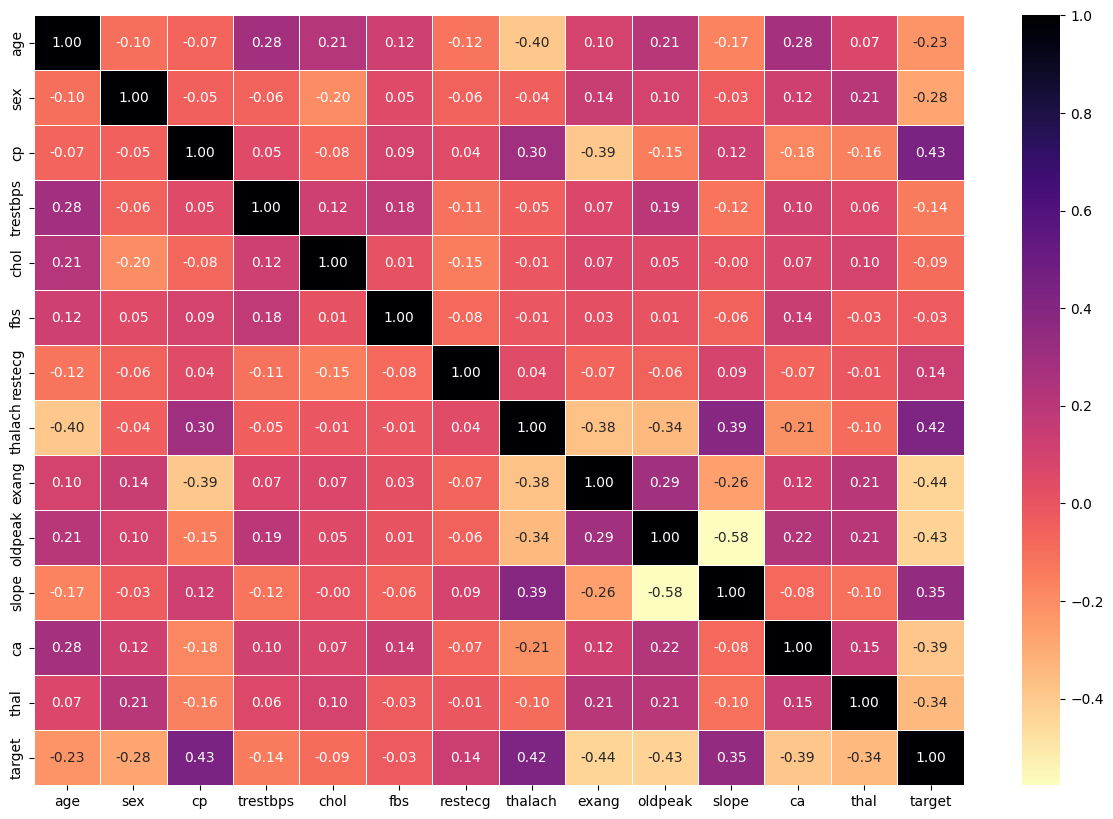

In [16]:
corr_matrix = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap = "magma_r");

This correlation matrix tells us how related each feature/variable is with each other. A higher positive value means a potential positive correlation and a higher negative value means a potential negative correlation. In relation to the target variable, it seems that general chest pain and maximum heart rate are the most positively associated, whereas, both chest pain and heart stress induced by exercise seem to be negatively associated. 

### Modeling

In [17]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [18]:
# Splitting data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

# Random seed for consistent results
np.random.seed(42)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

We will be using 80% of our data for training our model and the remaining 20% will be used for testing. Below, we can see that our training set contains 242 samples, while our test set contains 61.

In [19]:
len(X_train), len(y_train), len(X_test), len(y_test)

(242, 242, 61, 61)

In [20]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [21]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

The data is now prepared and is ready to be used in model building. As this is a binary classification problem, we will be experimenting with Logistic Regression, K-Nearest Neighbors, as well as Random Forest and comparing their results.

In [22]:
# Creating a dictionary with the 3 models
models = {"Logistic Regression": LogisticRegression(), "K-Nearest Neighbors": KNeighborsClassifier(),
"Random Forest": RandomForestClassifier()}

# Creating a function to fit and score the models
def fit_score(models, X_train, X_test, y_train, y_test):
    # Random seed for consistent results
    np.random.seed(42)
    # Empty dictionary to keep model scores
    model_scores ={}
    # Loop for models
    for name, model in models.items():
        # Fitting model
        model.fit(X_train, y_train)
        # Evaluate model and append score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [23]:
model_scores = fit_score(models=models, 
X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

From these scores, we see that Logistic Regression performed the best, followed by Random Forest, and K-Nearest Neighbors performed the poorest. We can compare these results in a plot below.

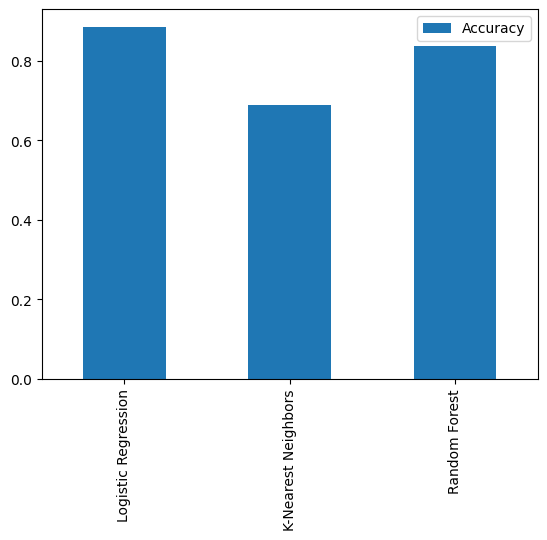

In [24]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar();

Despite KNN performing the worst by far, we will try tuning the model by changing the number of neighbors to see if there is any scope of getting a higher accuracy.

In [25]:
train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()

# Loop through n neighbors from 1-20
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    # Update train_scores list
    train_scores.append(knn.score(X_train, y_train))
    # Update the test scores list 
    test_scores.append(knn.score(X_test, y_test))


Maximum KNN Score on test data: 75.41%


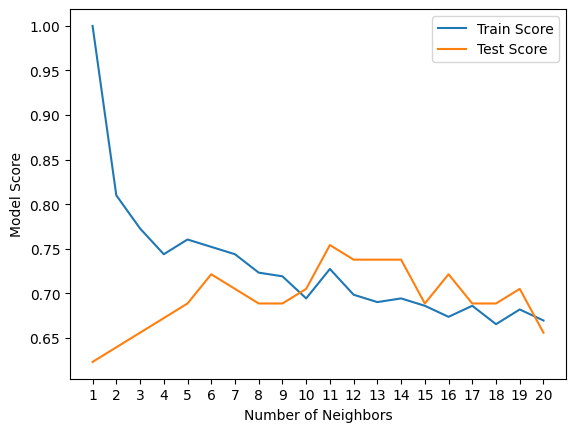

In [26]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1, 21, 1));
print(f'''Maximum KNN Score on test data: {max(test_scores)*100:.2f}%''')

From the graph, the number of neighbors set to 11 results in the best model score of 75.41%. However, this is still below the accuracies we received for both Logistic Regression and Random Forest, so we will stop utilizing KNN henceforth.

We will now focus on tuning hyper-parameters for the Logistic Regression and Random Forest models.

In [27]:
# Different hyperparameters for logistic regression
lr_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

We will test out the varying hyper-parameters for the Logistic Regression and set the number of iterations to 20 such that there will a 20 different combinations of the listed hyper-parameters on the grid.

In [28]:
# Random seed for consistent results
np.random.seed(42)

# Creating randomized hyperparameter search
rs_lr = RandomizedSearchCV(LogisticRegression(), param_distributions=lr_grid, cv=5, n_iter=20,
verbose=True)

# Fitting search model
rs_lr.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [29]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_lr.score(X_test, y_test)

0.8852459016393442

This happens to be exactly the same to what our baseline Logistic Regression model received. We will now apply the same process for the Random Forest estimator.

In [31]:
# Different hyperparameters for random forest
rf_grid = {"n_estimators": np.arange(10, 1000, 50), "max_depth": [None, 3, 5, 10],
"min_samples_split": np.arange(2, 20, 2), "min_samples_leaf": np.arange(1, 20, 2)}

In [32]:
# Random seed for consistent results
np.random.seed(42)

# Creating randomized hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20,
verbose=True)

# Fitting search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [33]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In this case, we managed to improve our Random Forest model by just over 3% as compared to the baseline. However, this accuracy is still lower than that of our original Logistic Regression model.

In [35]:
# Different grid
lr_grid2 = {"C": np.logspace(-4, 4, 50), "solver": ["liblinear"], "penalty": ["l1", "l2"]}
# Creating grid hyperparameters search
gs_lr = GridSearchCV(LogisticRegression(), param_grid=lr_grid2, cv=5, verbose=True)

# Fitting grid model
gs_lr.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [36]:
gs_lr.best_params_

{'C': 0.18420699693267145, 'penalty': 'l2', 'solver': 'liblinear'}

In [37]:
gs_lr.score(X_test, y_test)

0.8852459016393442

Yet again, when we score our Logistic Regression model with different hyper-parameter tuning, we still receive the same accuracy. It seems that this may be the highest accuracy we can achieve without adding more features or samples. We will now evaluate our model with its best parameters. 

### Evaluation

In [38]:
y_preds = gs_lr.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

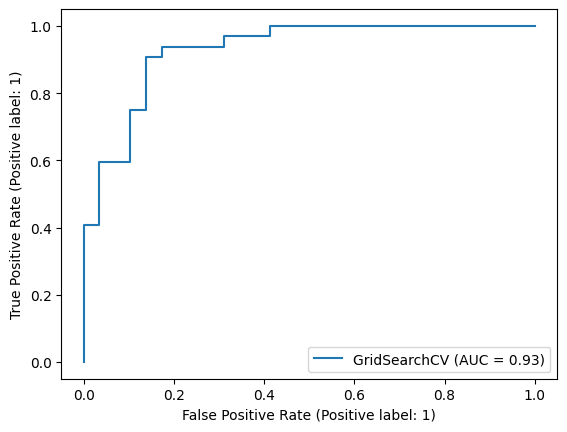

In [39]:
RocCurveDisplay.from_estimator(estimator=gs_lr, X=X_test, y=y_test);

Our model performs decently, getting an AUC score of 0.93. Randomly guessing the labels would result in a line going from the bottom left corner to the top right corner, with an AUC of 0.5, so we are far above that. However, a perfect model would achieve an AUC score of 1.0, so there is still room for improvement.

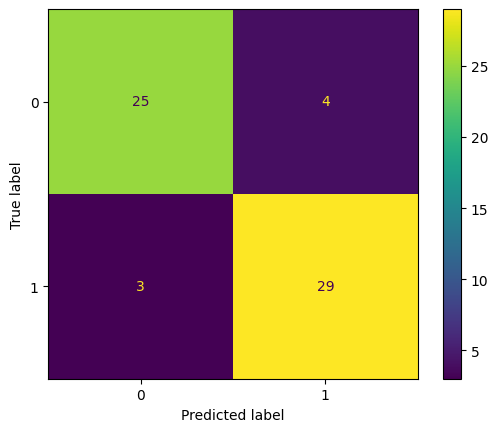

In [40]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

From this confusion matrix, we are able to see another way in which the model has performed. The model gets confused (predicts the wrong label) similarly across both classes. There are 4 instances where the model predicted 1 (disease) when it should've predicted 0 (no disease), which is classified as a false positive. There are 3 instances where the model predicted 0 (no disease) when it should have predicted 1 (disease), which is classified as a false negative. In total, the model predicted 54 out 61 labels correctly.

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Precision score indicates the proportion of positive identifications (predicted class 1) which were actually correct (29/33). Recall indicates the the proportion of actual positives which were correctly classified (29/32). The F1 score is a combination of the previous two. So far, we have only built models and evaluated them on a single training and test set. We will now use cross-validation to further solidify our finings.

In [42]:
gs_lr.best_params_

{'C': 0.18420699693267145, 'penalty': 'l2', 'solver': 'liblinear'}

In [43]:
best_model = LogisticRegression(C=0.18420699693267145, penalty="l2", solver="liblinear")
# Cross-validated accuracy
cv_acc = np.mean(cross_val_score(best_model, X, y, cv=5, scoring='accuracy'))
cv_acc

0.8446994535519124

The average of the 5 cross-validated accuracy scores is around 84.5%, which is lower than our original accuracy. We will now do the same for precision, recall, and F1

In [44]:
# Cross-validated precision
cv_prec = np.mean(cross_val_score(best_model, X, y, cv=5, scoring='precision'))
# Cross-validated recall
cv_rec = np.mean(cross_val_score(best_model, X, y, cv=5, scoring='recall'))
# Cross-validated F1
cv_f1 = np.mean(cross_val_score(best_model, X, y, cv=5, scoring='f1'))
cv_prec, cv_rec, cv_f1

(0.8207936507936507, 0.9212121212121213, 0.8673007976269721)

The 5 fold cross validated scores for precision, recall, and F1 are about 82.1%, 92.1%, and 86.7% respectively. We receive lower precision and f1 scores, just like with accuracy, however we also see an improvement on recall. We can see a visualization of all our cross-validated scores below.

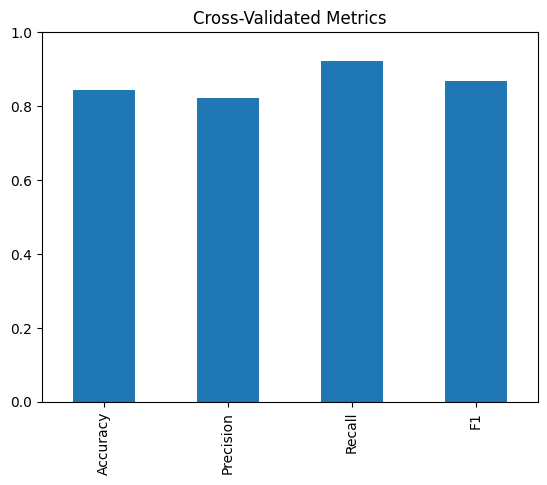

In [45]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_prec, "Recall": cv_rec, "F1": cv_f1},
index = [0])
cv_metrics.T.plot.bar(title = "Cross-Validated Metrics", legend = False, ylim=(0, 1));

We will now discuss feature importance.

In [46]:
best_model.fit(X_train, y_train);
best_model.coef_

array([[ 0.00274534, -0.82466189,  0.64946587, -0.01155522, -0.00162953,
         0.04067028,  0.29769479,  0.02448922, -0.58200187, -0.56321729,
         0.43464708, -0.62480489, -0.66201557]])

In [47]:
# Combine coef features with columns
feature_imp = dict(zip(df.columns, list(best_model.coef_[0])))
feature_imp

{'age': 0.0027453388352257635,
 'sex': -0.8246618925571113,
 'cp': 0.649465871383795,
 'trestbps': -0.011555217566749123,
 'chol': -0.0016295281614062173,
 'fbs': 0.04067028104738057,
 'restecg': 0.2976947900867185,
 'thalach': 0.024489217683750515,
 'exang': -0.5820018705424636,
 'oldpeak': -0.5632172851970934,
 'slope': 0.4346470797005884,
 'ca': -0.6248048890288698,
 'thal': -0.6620155661348825}

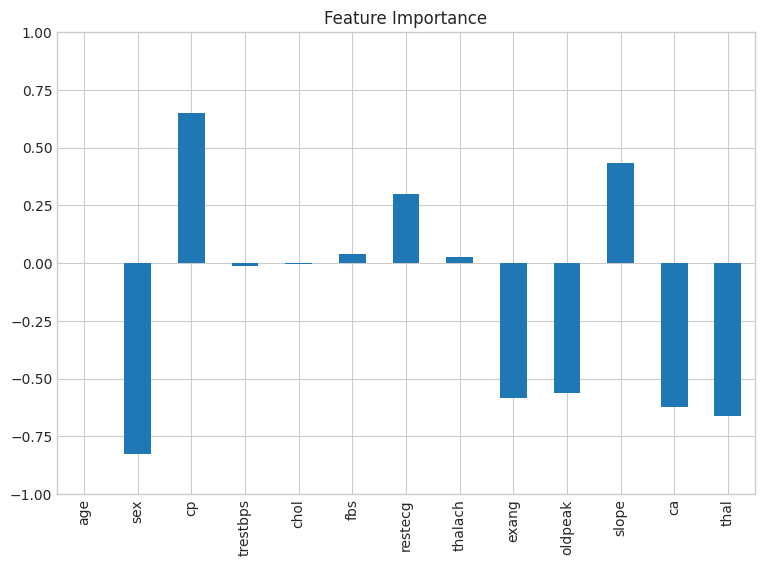

In [48]:
feature_imp_df = pd.DataFrame(feature_imp, index=[0])
plt.style.use('seaborn-v0_8-whitegrid')
ax = feature_imp_df.T.plot(kind = "bar", figsize=(9, 6), 
legend = False, title = "Feature Importance", ylim = (-1, 1))


The larger the value and bigger the bar, the more a feature contributes to the target variable. If the value is negative, it means there is a negative correlation between the feature and the target variable. If there is a positive value, then likewise, there is a positive correlation. It seems that sex is the most influential feature, with cp, exang, oldpeak, ca, and thal also showing considerable importance. This makes sense as we found previously that from the patients in the sample, females have a far greater ratio of disease to no disease, as compared to males. This means the model has found a pattern in which if patients are female, they are more likely to have heart disease. 

This information could be beneficial to show to a subject matter expert. They would be intrigued to see where the machine learning model finds the most patterns in the data. They would also be able to provide more insight on how the features should be interacting with the target variable, which would improve the model building process. Moreover, there are a few features with little importance, removing such variables utilizing a method such as backward elimination may result in models that score better in our evaluation metrics.

### Key Findings

- 54% of patients in the sample had heart disease

- Patients with heart disease had higher maximum heart rates on average than those who did not

- Patients that were women were far more more likely to have heart disease compared to men

- A logistic regression model was able to predict the labels the best, however, it could not go beyond 89% accuracy

- Sex was the most influential feature, along with chest pain type, the number of major vessels colored by flourosopy, thallium stress result, and exercise related variables.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e9eae15-1373-4b10-93d7-f6580ec0c6f3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>